[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


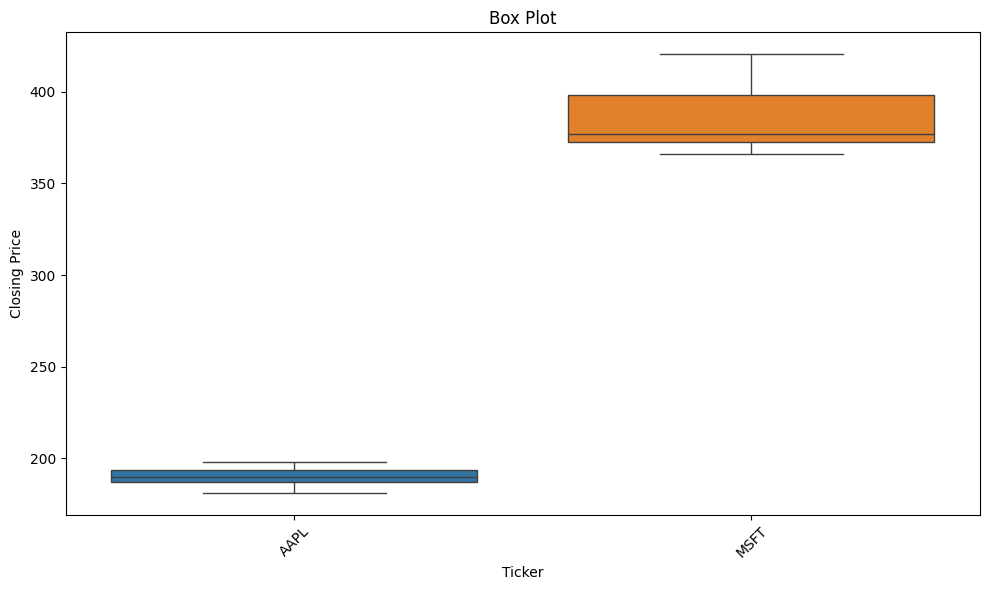

      count        mean        std         min         25%         50%  \
AAPL   62.0  190.235000   4.171838  181.179993  187.222496  189.959999   
MSFT   62.0  384.471936  15.589616  365.929993  372.754997  376.800003   

             75%         max        IQR  
AAPL  193.540001  198.110001   6.317505  
MSFT  398.397507  420.549988  25.642509  

Outliers:
Empty DataFrame
Columns: [AAPL, MSFT]
Index: []

Autocorrelation for AAPL: 0.8773972873839129

Correlation Coefficient:
          AAPL      MSFT
AAPL  1.000000 -0.211548
MSFT -0.211548  1.000000


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of ticker symbols
ticker_symbols = ['AAPL', 'MSFT']

# Load historical data for the tickers
all_data = pd.DataFrame()
for ticker_symbol in ticker_symbols:
    data = yf.download(ticker_symbol, period='3mo', interval='1d')[['Close']]
    data.columns = [ticker_symbol]  # Rename column to the ticker symbol
    all_data = pd.concat([all_data, data], axis=1)

# Calculate statistical properties
statistics = all_data.describe().transpose()
statistics['IQR'] = statistics['75%'] - statistics['25%']  # Interquartile range

# Calculate z-score for each ticker
z_scores = pd.DataFrame()
for ticker_symbol in ticker_symbols:
    z_score = (all_data[ticker_symbol] - statistics.loc[ticker_symbol, 'mean']) / statistics.loc[ticker_symbol, 'std']
    z_scores[ticker_symbol + '_zScore'] = z_score

# Detect outliers using z-score
outliers = all_data[(z_scores.abs() > 3).any(axis=1)]

# Plot box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_data)
plt.title('Box Plot')
plt.xlabel('Ticker')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Autocorrelation plot for AAPL
autocorrelation = all_data['AAPL'].autocorr()

# Correlation coefficient
correlation_coefficient = all_data.corr()

# Print statistical properties
print(statistics)

# Print outliers
print("\nOutliers:")
print(outliers)

# Print autocorrelation
print(f"\nAutocorrelation for AAPL: {autocorrelation}")

# Print correlation coefficient
print("\nCorrelation Coefficient:")
print(correlation_coefficient)


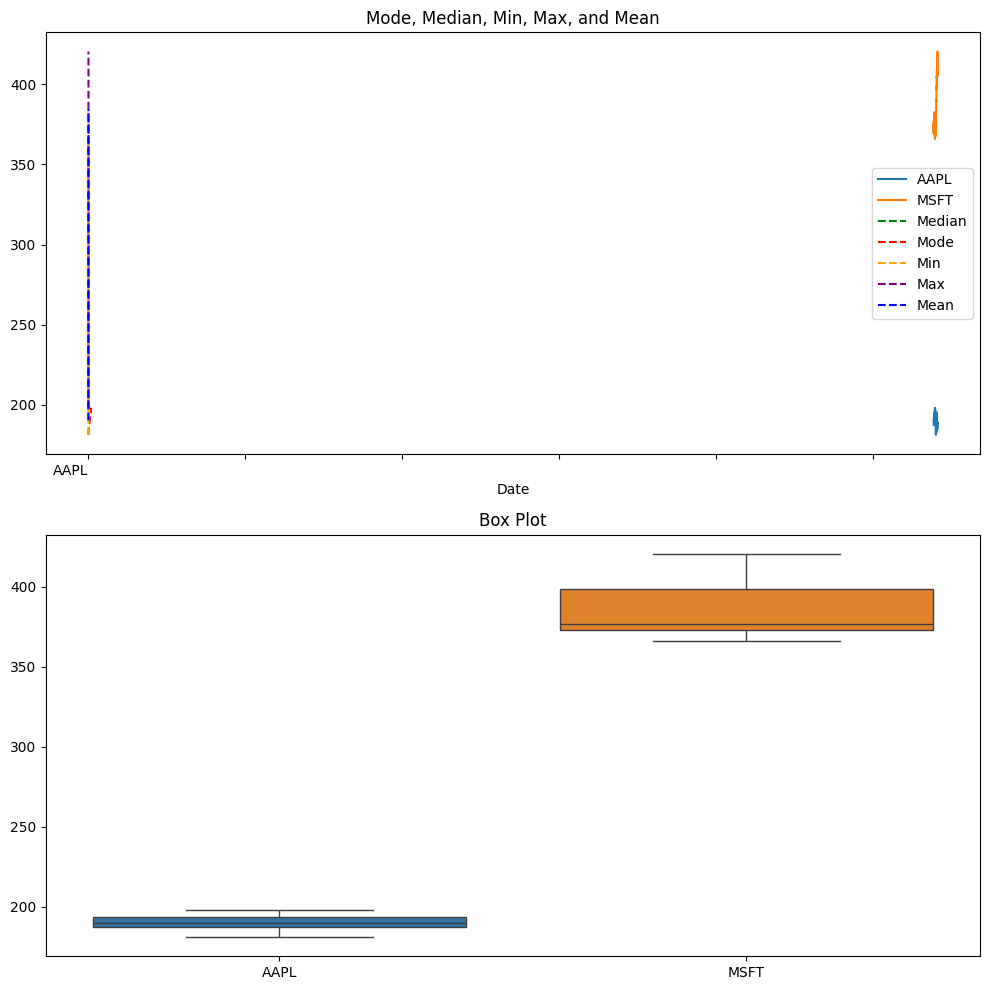

Autocorrelation for AAPL: 0.8773972873839129

Correlation Coefficient:
          AAPL      MSFT
AAPL  1.000000 -0.211548
MSFT -0.211548  1.000000

Outliers:
Empty DataFrame
Columns: [AAPL, MSFT]
Index: []


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot mode, median, min, max, and mean
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
all_data.plot(ax=axes[0], title='Mode, Median, Min, Max, and Mean', legend=True)
all_data.median().plot(ax=axes[0], legend=True, label='Median', linestyle='--', color='green')
all_data.mode().transpose().iloc[0].plot(ax=axes[0], legend=True, label='Mode', linestyle='--', color='red')
all_data.min().plot(ax=axes[0], legend=True, label='Min', linestyle='--', color='orange')
all_data.max().plot(ax=axes[0], legend=True, label='Max', linestyle='--', color='purple')
all_data.mean().plot(ax=axes[0], legend=True, label='Mean', linestyle='--', color='blue')

# Plot box plot
sns.boxplot(data=all_data, ax=axes[1])
axes[1].set_title('Box Plot')

plt.tight_layout()
plt.show()

# Print autocorrelation
print(f"Autocorrelation for AAPL: {autocorrelation}")

# Print correlation coefficient
print("\nCorrelation Coefficient:")
print(correlation_coefficient)

# Print outliers
print("\nOutliers:")
print(outliers)


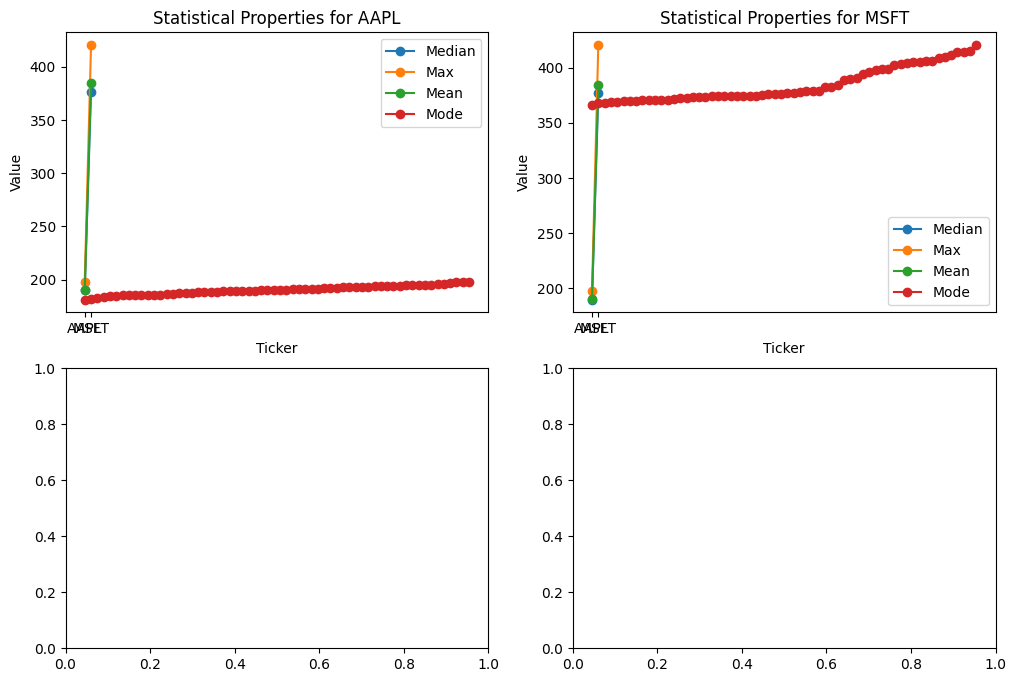

In [10]:


# Calculate mode for each ticker
mode = all_data.mode()

# Plot median, max, and mean for each ticker separately
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, ticker_symbol in enumerate(ticker_symbols):
    row = i // 2
    col = i % 2

    ax = axes[row, col]
    ax.plot(statistics.index, statistics['50%'], label='Median', linestyle='-', marker='o')
    ax.plot(statistics.index, statistics['max'], label='Max', linestyle='-', marker='o')
    ax.plot(statistics.index, statistics['mean'], label='Mean', linestyle='-', marker='o')
    ax.plot(mode.index, mode[ticker_symbol], label='Mode', linestyle='-', marker='o')

    ax.set_title(f'Statistical Properties for {ticker_symbol}')
    ax.set_xlabel('Ticker')
    ax.set_ylabel('Value')
    ax.set_xticks(range(len(ticker_symbols)))
    ax.set_xticklabels(ticker_symbols)
    ax.legend()

plt.tight_layout()
plt.show()


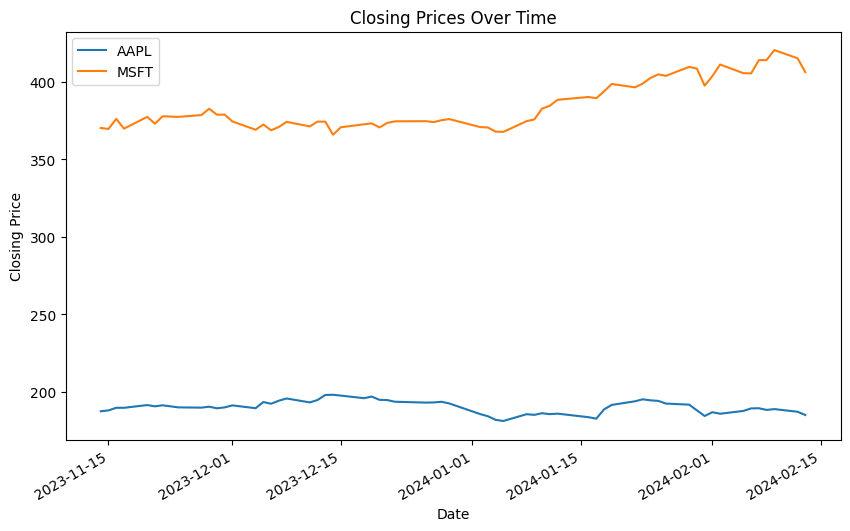

In [11]:
all_data.plot(figsize=(10, 6))
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(ticker_symbols)
plt.show()

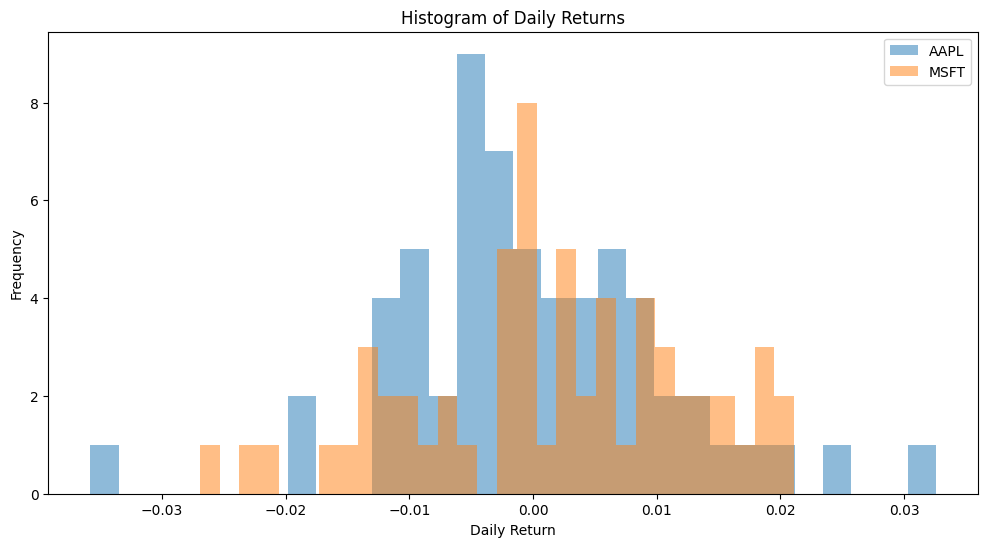

In [18]:
# Plot histogram of daily returns for each ticker
plt.figure(figsize=(12, 6))
for ticker_symbol in ticker_symbols:
    daily_returns = all_data[ticker_symbol].pct_change()
    plt.hist(daily_returns, bins=30, alpha=0.5, label=ticker_symbol)

plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()

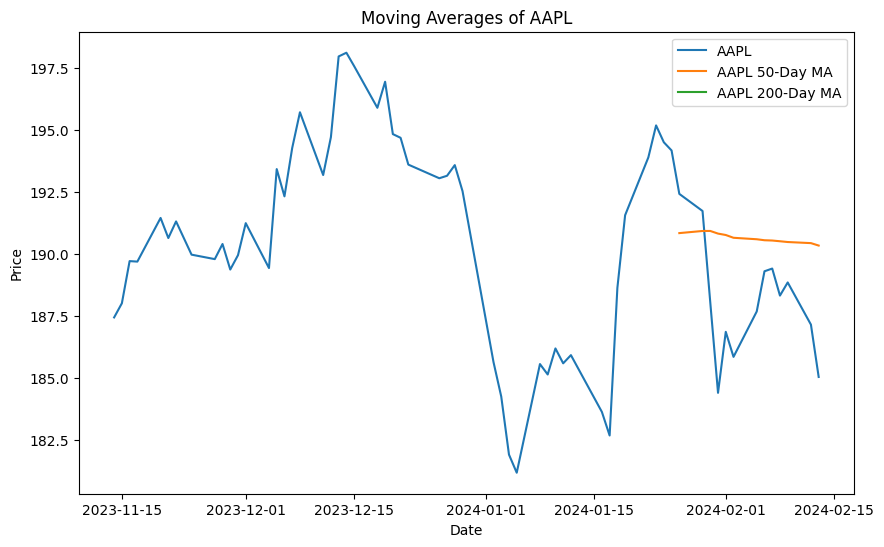

In [15]:
# Calculate moving averages
moving_avg_50 = all_data.rolling(window=50).mean()
moving_avg_200 = all_data.rolling(window=200).mean()

# Plot moving averages
plt.figure(figsize=(10, 6))
plt.plot(all_data.index, all_data['AAPL'], label='AAPL')
plt.plot(all_data.index, moving_avg_50['AAPL'], label='AAPL 50-Day MA')
plt.plot(all_data.index, moving_avg_200['AAPL'], label='AAPL 200-Day MA')
plt.title('Moving Averages of AAPL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



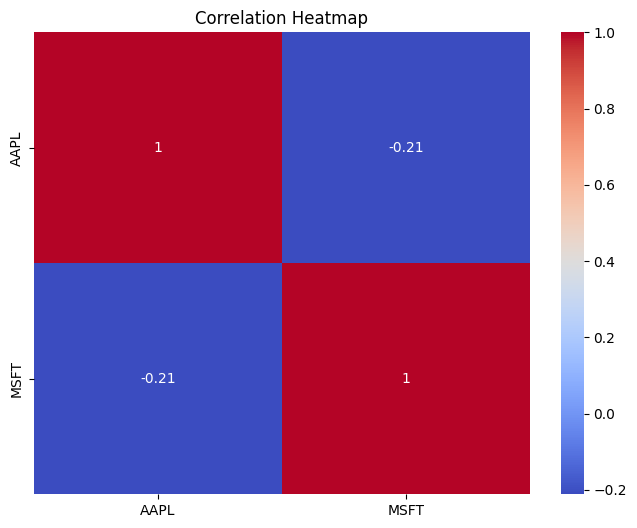

In [16]:
# Calculate correlation matrix
correlation_matrix = all_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

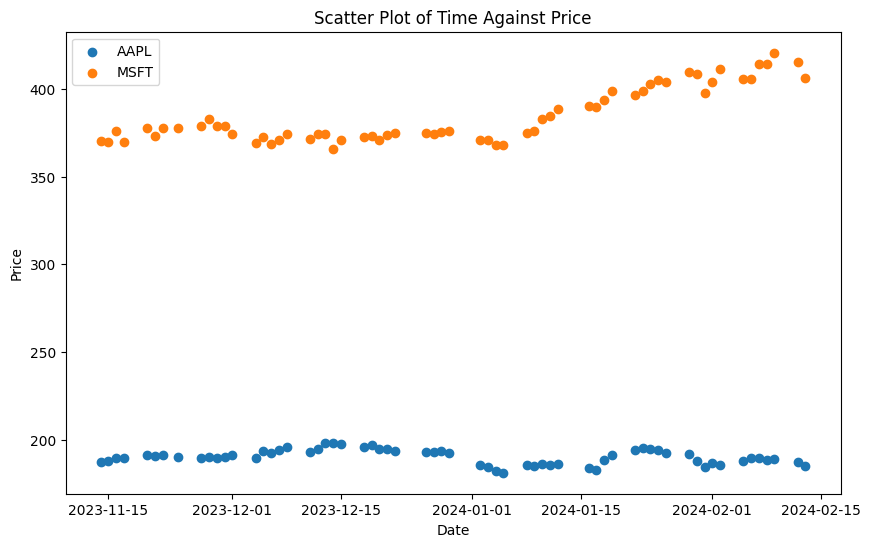

In [17]:
# Plot scatter plot of time against price with tickers in different colors
plt.figure(figsize=(10, 6))
for ticker_symbol in ticker_symbols:
    plt.scatter(all_data.index, all_data[ticker_symbol], label=ticker_symbol)
plt.title('Scatter Plot of Time Against Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()